## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# upload datasets
df = pd.read_csv('data/flightsdataEDA.csv')

In [3]:
df.head()

,fl_date,op_unique_carrier,tail_num,op_carrier_fl_num,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,...,dest_city,dest_state,arr_date,dep_datetime,arr_datetime,fl_month,fl_weekday,day_num_of_flights,num_flights_24hr,inbound_fl
0,2018-01-02 00:00:00,DL,N308DE,1124,ATL,RIC,17:25:00,1724.0,-1.0,11.0,...,Richmond,VA,2018-01-02 00:00:00,2018-01-02 17:25:00,2018-01-02 18:55:00,1,1,9,18,0
1,2018-01-02 00:00:00,DL,N308DE,1124,RIC,ATL,19:30:00,1923.0,-7.0,13.0,...,Atlanta,GA,2018-01-02 00:00:00,2018-01-02 19:30:00,2018-01-02 21:32:00,1,1,1,2,1
2,2018-01-02 00:00:00,DL,N342NB,1125,CLT,ATL,19:05:00,1911.0,6.0,21.0,...,Atlanta,GA,2018-01-02 00:00:00,2018-01-02 19:05:00,2018-01-02 20:29:00,1,1,1,1,0
3,2018-01-02 00:00:00,DL,N988DL,1126,BNA,DTW,18:43:00,1931.0,48.0,13.0,...,Detroit,MI,2018-01-02 00:00:00,2018-01-02 18:43:00,2018-01-02 21:25:00,1,1,1,1,0
4,2018-01-02 00:00:00,DL,N951DL,1127,ATL,IND,09:11:00,910.0,-1.0,15.0,...,Indianapolis,IN,2018-01-02 00:00:00,2018-01-02 09:11:00,2018-01-02 10:42:00,1,1,9,14,0


In [4]:
dfcol = df['dup']
dfcol.head()

0    N
1    N
2    N
3    N
4    N
Name: dup, dtype: object

In [5]:
df['dup'].unique()

array(['N'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6923 entries, 0 to 6922
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fl_date              6923 non-null   object 
 1   op_unique_carrier    6923 non-null   object 
 2   tail_num             6923 non-null   object 
 3   op_carrier_fl_num    6923 non-null   int64  
 4   origin               6923 non-null   object 
 5   dest                 6923 non-null   object 
 6   crs_dep_time         6923 non-null   object 
 7   dep_time             6923 non-null   float64
 8   dep_delay            6922 non-null   float64
 9   taxi_out             6914 non-null   float64
 10  wheels_off           6914 non-null   float64
 11  wheels_on            6914 non-null   float64
 12  taxi_in              6914 non-null   float64
 13  crs_arr_time         6923 non-null   object 
 14  arr_time             6923 non-null   float64
 15  arr_delay            6923 non-null   f

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [7]:
from scipy import stats
import seaborn as sns
from seaborn_qqplot import pplot

In [8]:
# arr_delay
arr_delay = df['arr_delay']

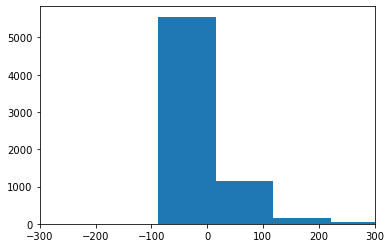

In [9]:
# histogram plot
plt.hist(arr_delay)
plt.xlim(-300, 300)
plt.show()

(-300.0, 300.0)

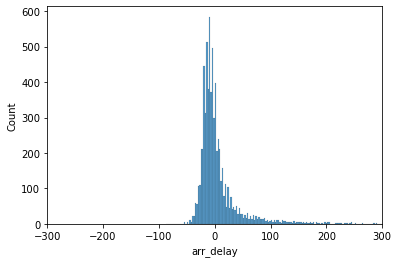

In [10]:
sns.histplot(arr_delay)
plt.xlim(-300, 300)

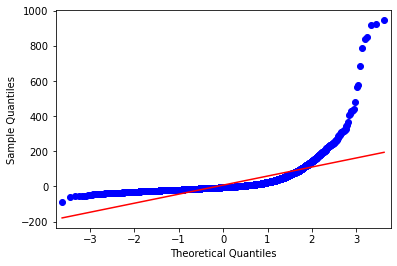

In [11]:
from statsmodels.graphics.gofplots import qqplot
# q-q plot
qqplot(arr_delay, line='s')
plt.show()

In [59]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(arr_delay)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.504, p=0.000
Sample does not look Gaussian (reject H0)


In [60]:
from scipy.stats import normaltest
# normality test
stat, p = normaltest(arr_delay)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=9045.586, p=0.000
Sample does not look Gaussian (reject H0)


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [31]:
import datetime as dt
from datetime import date
from datetime import time

In [61]:
df['fl_date'] = pd.to_datetime(df['fl_date'])

In [62]:
df['month'] = df['fl_date'].dt.month

df['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [89]:
#monthly_count = df.groupby(['month'])['arr_delay'].count()
monthly_count = df.groupby(['fl_month'])['arr_delay'].count()

In [90]:
monthly_count = pd.DataFrame(monthly_count)
monthly_count

,arr_delay
fl_month,
1,415
2,952
3,456
4,631
5,451
6,830
7,609
8,587
9,369


<AxesSubplot:xlabel='fl_month', ylabel='arr_delay'>

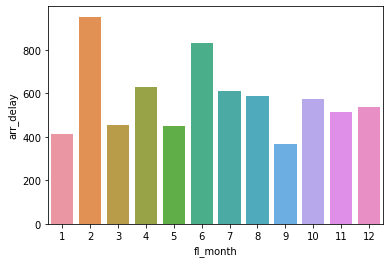

In [91]:
sns.barplot(x= monthly_count.index,y=monthly_count['arr_delay'])

<AxesSubplot:xlabel='month', ylabel='arr_delay'>

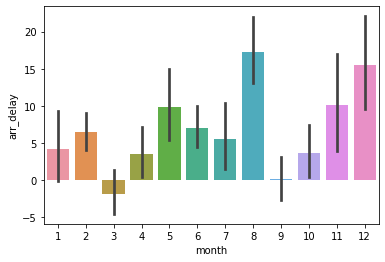

In [66]:
monthly_avg = df.groupby(['month'])['arr_delay'].mean()
sns.barplot(x=df['month'],y=df['arr_delay'])

In [67]:
monthly_avg

month
1      4.168675
2      6.487395
3     -1.848684
4      3.519810
5      9.798226
6      7.055422
7      5.505747
8     17.235094
9      0.216802
10     3.643357
11    10.076023
12    15.486989
Name: arr_delay, dtype: float64

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [68]:
df['crs_dep_time']

0       17:25:00
1       19:30:00
2       19:05:00
3       18:43:00
4       09:11:00
          ...   
6918    16:40:00
6919    14:50:00
6920    11:00:00
6921    18:55:00
6922    12:10:00
Name: crs_dep_time, Length: 6923, dtype: object

<AxesSubplot:xlabel='taxi_out', ylabel='Count'>

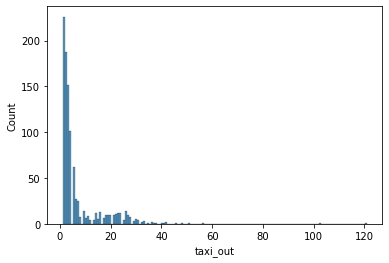

In [69]:
task4a = df.groupby(['crs_dep_time'])['taxi_out'].count()
sns.histplot(task4a)

<AxesSubplot:xlabel='crs_dep_time', ylabel='taxi_out'>

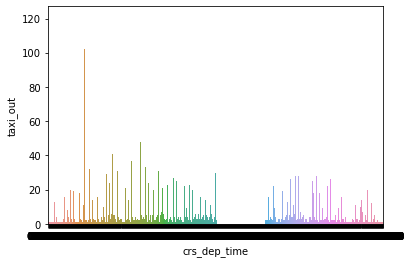

In [70]:
task4a_count = pd.DataFrame(task4a)
sns.barplot(x=task4a_count.index,y=task4a_count['taxi_out'])

<AxesSubplot:xlabel='arr_time', ylabel='taxi_in'>

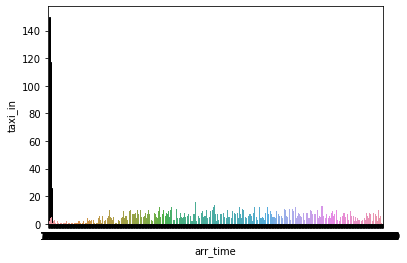

In [71]:
task4b = df.groupby(['arr_time'])['taxi_in'].count()
sns.histplot(task4b)

task4b_count = pd.DataFrame(task4b)
sns.barplot(x=task4b_count.index,y=task4b_count['taxi_in'])

<AxesSubplot:xlabel='arr_time', ylabel='taxi_in'>

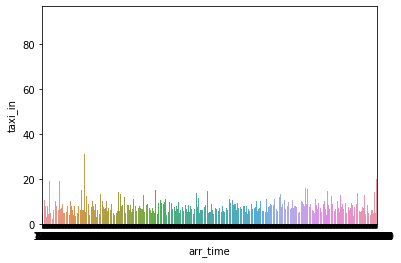

In [72]:
sns.barplot(x=df['arr_time'],y=df['taxi_in'], ci=None)

<AxesSubplot:xlabel='dep_time', ylabel='taxi_out'>

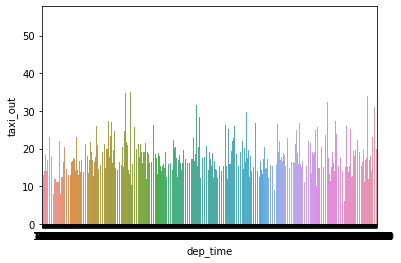

In [73]:
sns.barplot(x=df['dep_time'],y=df['taxi_out'], ci=None)

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [74]:
df[df['arr_delay']!=0]['arr_delay'].count()

6778

In [75]:
adelay_count = df[df['arr_delay']!=0]['arr_delay'].count()

In [76]:
#avg count
col_5 = [
    'carrier_delay',
    'weather_delay',
    'nas_delay',
    'security_delay',
    'late_aircraft_delay'
]
task5_count = 0
for i in df[col_5]:
    task5_count += (df[df[i]>0]['arr_delay'].count())
print(task5_count)


print(task5_count/adelay_count)

2256
0.3328415461788138


In [77]:
dep_delay_count = df[df['dep_delay']==1]['dep_delay'].count()
arr_delay_count = df[df['arr_delay']==1]['arr_delay'].count()
delay_ratio = dep_delay_count/(dep_delay_count+arr_delay_count)
delay_ratio

0.5145985401459854

#### **Task 6**: How many states cover 50% of US air traffic? 

In [136]:
#df['origin_city'].unique()


In [137]:
half = int(len(df)/2)

In [138]:
df_half = df[:half]

In [139]:
print(df_half['origin_state'].unique())

[' GA' ' VA' ' NC' ' TN' ' IN' ' UT' ' FL' ' MN' ' CA' ' OR' ' MI' ' OK'
 ' SC' ' WA' ' NE' ' IL' ' HI' ' CO' ' TX' ' RI' ' NV' ' SD' ' MO' ' OH'
 ' AZ' ' KY' ' WI' ' ND' ' NM' ' ID' ' AR' ' NY' ' PA' ' VT' ' ME' ' MA'
 ' NJ' ' DC' ' MT' ' WY' ' AL' ' LA' ' MD' ' CT' ' AK' ' KS' ' IA' ' WV'
 ' NH' ' TT' ' MS' ' PR' ' VI']


In [149]:
#df_half = df_half.groupby(['origin_state'])['origin_state'].count()
df_half.groupby(['origin_state']).sum().sort_values(ascending=False)

origin_state
 CA    327
 IL    267
 TX    251
 FL    244
 NY    235
 NC    165
 GA    144
 WA    131
 CO    122
 DC    119
 PA    105
 NV    104
 AZ     98
 MI     96
 OH     91
 HI     79
 MN     70
 MA     66
 NJ     53
 TN     51
 OR     49
 UT     48
 MD     47
 MO     41
 IN     40
 VA     40
 SC     38
 LA     32
 NM     30
 WI     28
 CT     24
 AL     23
 ID     20
 KY     19
 PR     17
 IA     16
 OK     15
 MT     14
 ND     13
 ME     13
 NE     13
 AR     12
 VT      8
 RI      7
 KS      6
 SD      6
 WY      5
 MS      5
 WV      5
 TT      3
 NH      2
 VI      2
 AK      2
Name: origin_state, dtype: int64

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [78]:
df['avg_velocity'] = df['distance']/df['air_time']*60
for i in col_5:
    df['dep_del'] = np.where(df[i]>0,1,0)

In [79]:
df['dep_delay'].describe()

count    6922.000000
mean       11.527449
std        49.151111
min       -22.000000
25%        -6.000000
50%        -2.000000
75%         8.000000
max       944.000000
Name: dep_delay, dtype: float64

In [80]:
delay_speed = df[df['dep_del']==1]['avg_velocity']
no_delay_speed = df[df['dep_del']==0]['avg_velocity']

In [81]:
stats.f_oneway(delay_speed,no_delay_speed)

F_onewayResult(statistic=nan, pvalue=nan)

In [82]:
stats.kruskal(delay_speed,no_delay_speed)

KruskalResult(statistic=nan, pvalue=nan)

In [83]:
df['delay'] = np.where(df['arr_delay']>0, 1, 0)
delay_speed2 = df[df['dep_del']==1]['avg_velocity']
no_delay_speed2 = df[df['dep_del']==0]['avg_velocity']

In [84]:
df['delay'].describe()

count    6923.000000
mean        0.368771
std         0.482506
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: delay, dtype: float64

In [85]:
stats.f_oneway(delay_speed2,no_delay_speed2)

F_onewayResult(statistic=nan, pvalue=nan)

<AxesSubplot:xlabel='avg_velocity', ylabel='Count'>

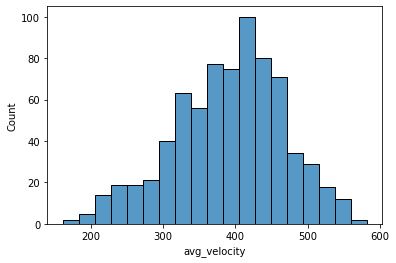

In [86]:
sns.histplot(delay_speed2)

<AxesSubplot:xlabel='avg_velocity', ylabel='Count'>

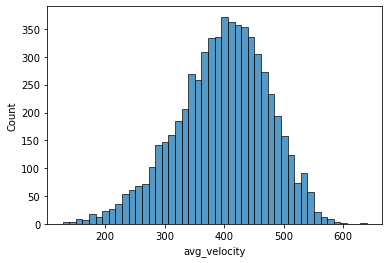

In [87]:
sns.histplot(no_delay_speed2)

In [150]:
df[['actual_elapsed_time','air_time']]

,actual_elapsed_time,air_time
0,76.0,61.0
1,113.0,78.0
2,77.0,45.0
3,86.0,66.0
4,85.0,65.0
...,...,...
6918,112.0,89.0
6919,108.0,88.0
6920,102.0,89.0
6921,106.0,91.0


In [151]:
df['e_time_diff'] = df['actual_elapsed_time']-df['air_time']
df['e_time_diff'].describe()

count    6914.000000
mean       25.381255
std        12.342390
min         3.000000
25%        18.000000
50%        22.000000
75%        30.000000
max       160.000000
Name: e_time_diff, dtype: float64

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [152]:
# > 6 = long, 3-6 medium, < 3 short

df['air_time_hr'] = df['air_time']/60
df['air_time_hr']

0       1.016667
1       1.300000
2       0.750000
3       1.100000
4       1.083333
          ...   
6918    1.483333
6919    1.466667
6920    1.483333
6921    1.516667
6922    2.200000
Name: air_time_hr, Length: 6923, dtype: float64

In [153]:
bins = [0,3,6,np.inf]
names = ['short','medium','long']
df['air_time_bin'] = pd.cut(df['air_time_hr'],bins,labels=names)

In [154]:
df['air_time_bin']

0       short
1       short
2       short
3       short
4       short
        ...  
6918    short
6919    short
6920    short
6921    short
6922    short
Name: air_time_bin, Length: 6923, dtype: category
Categories (3, object): [short < medium < long]

In [155]:
df['air_time_bin'].unique()

[short, medium, long, NaN]
Categories (3, object): [short < medium < long]

<AxesSubplot:xlabel='dep_time', ylabel='air_time_hr'>

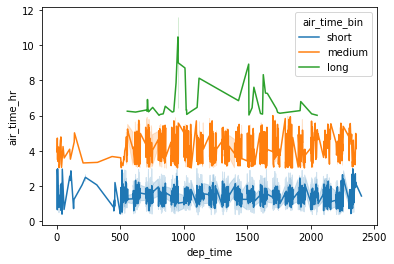

In [156]:
sns.lineplot(y=df['air_time_hr'],x=df['dep_time'],hue=df['air_time_bin'])

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [174]:
# upload datasets
passengers = pd.read_csv('data/passengers_raw.csv')
passengers.head()

,Unnamed: 0,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0,0.0,20.0,276001.0,1000.0,936.0,0.0,0.0,254.0,0.0,...,US,United States,4,484,1,2019,6,1,F,IF
1,1,0.0,27.0,405000.0,1350.0,1281.0,0.0,0.0,254.0,0.0,...,US,United States,6,629,1,2019,6,1,F,IF
2,2,0.0,15.0,341251.0,1140.0,974.0,0.0,0.0,254.0,0.0,...,US,United States,6,638,1,2019,6,1,F,IF
3,3,0.0,56.0,840000.0,2800.0,2147.0,0.0,0.0,460.0,0.0,...,US,United States,6,629,1,2019,6,1,F,IF
4,4,0.0,55.0,825000.0,2750.0,2384.0,0.0,0.0,487.0,0.0,...,US,United States,6,629,1,2019,6,1,F,IF


In [167]:
Task9 = df['op_carrier_fl_num'].value_counts()
Task9

225     8
131     8
677     8
687     8
2034    7
       ..
3048    1
1001    1
1005    1
1013    1
4080    1
Name: op_carrier_fl_num, Length: 3684, dtype: int64

In [173]:
#Find the top 10 the bussiest airlines
df9 = df.groupby(['op_unique_carrier'])['op_carrier_fl_num'].count().sort_values(ascending=False).head(10)
df9

op_unique_carrier
WN    1189
AA     785
DL     780
OO     635
UA     475
B6     425
MQ     289
YX     286
OH     260
9E     221
Name: op_carrier_fl_num, dtype: int64

In [176]:
#Find the top 10 the bussiest origin airports
df9b = df.groupby(['origin'])['op_carrier_fl_num'].count().sort_values(ascending=False).head(10)
df9b

origin
ORD    314
ATL    295
CLT    255
LAX    210
DFW    202
SEA    194
DEN    192
DCA    186
LGA    175
PHX    168
Name: op_carrier_fl_num, dtype: int64

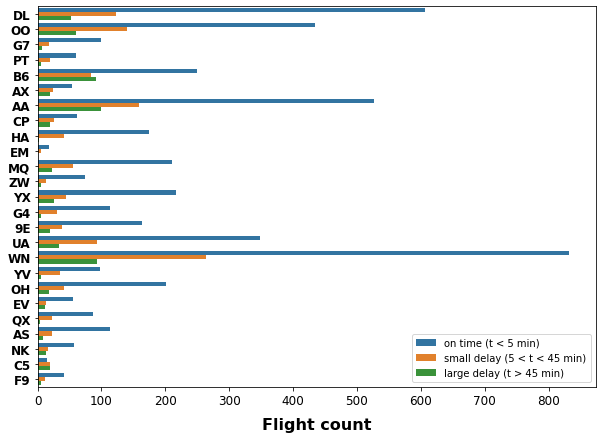

In [180]:
#_____________________________________________
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['arr_delay'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="op_unique_carrier", hue='DELAY_LEVEL', data=df)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels
labels = [item.get_text() for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

In [202]:
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df['arr_delay'].groupby(df['op_unique_carrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count',ascending=False)
global_stats

,min,max,count,mean
op_unique_carrier,,,,
WN,-43.0,324.0,1189.0,5.377628
AA,-45.0,322.0,785.0,11.671338
DL,-53.0,683.0,780.0,1.383333
OO,-55.0,926.0,635.0,7.777953
UA,-43.0,432.0,475.0,2.433684
B6,-55.0,851.0,425.0,26.510588
MQ,-40.0,577.0,289.0,3.494810
YX,-58.0,568.0,286.0,6.541958
OH,-36.0,262.0,260.0,2.657692


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

# More Plots

In [110]:
carrierdf = df['op_unique_carrier'].unique()

In [111]:
carrierdf

array(['DL', 'OO', 'G7', 'PT', 'B6', 'AX', 'AA', 'CP', 'HA', 'EM', 'MQ',
       'ZW', 'YX', 'G4', '9E', 'UA', 'WN', 'YV', 'OH', 'EV', 'QX', 'AS',
       'NK', 'C5', 'F9'], dtype=object)

In [122]:
carrierplot = df['arr_delay'].groupby(df['op_unique_carrier']).count()

<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

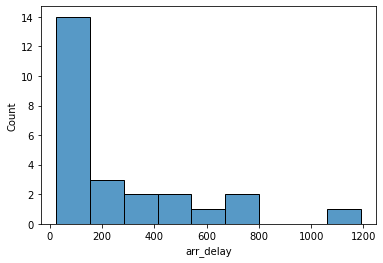

In [124]:
sns.histplot(carrierplot)

<AxesSubplot:xlabel='dep_delay', ylabel='op_unique_carrier'>

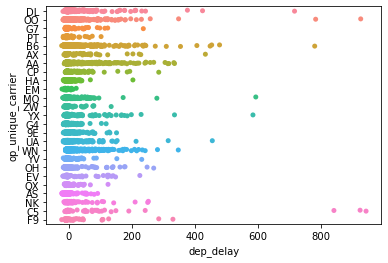

In [17]:
sns.stripplot(x='dep_delay',y='op_unique_carrier',data=df)

## Hight volume airports

In [24]:
hi_volume = df['origin'].value_counts()[:20]
hi_volume
    

ORD    314
ATL    295
CLT    255
LAX    210
DFW    202
SEA    194
DEN    192
DCA    186
LGA    175
PHX    168
PHL    168
LAS    147
SFO    142
BOS    131
MSP    130
IAH    124
JFK    122
BWI    122
HNL    120
MDW    118
Name: origin, dtype: int64

In [26]:
hi_volume_airports_names = hi_volume.index.tolist()
print (hi_volume_airports_names)

['ORD', 'ATL', 'CLT', 'LAX', 'DFW', 'SEA', 'DEN', 'DCA', 'LGA', 'PHX', 'PHL', 'LAS', 'SFO', 'BOS', 'MSP', 'IAH', 'JFK', 'BWI', 'HNL', 'MDW']


In [27]:
hi_volume_airports = df[df['origin'].isin(hi_volume_airports_names)]
hi_volume_airports.head()

,fl_date,op_unique_carrier,tail_num,op_carrier_fl_num,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,...,dest_city,dest_state,arr_date,dep_datetime,arr_datetime,fl_month,fl_weekday,day_num_of_flights,num_flights_24hr,inbound_fl
0,2018-01-02 00:00:00,DL,N308DE,1124,ATL,RIC,17:25:00,1724.0,-1.0,11.0,...,Richmond,VA,2018-01-02 00:00:00,2018-01-02 17:25:00,2018-01-02 18:55:00,1,1,9,18,0
2,2018-01-02 00:00:00,DL,N342NB,1125,CLT,ATL,19:05:00,1911.0,6.0,21.0,...,Atlanta,GA,2018-01-02 00:00:00,2018-01-02 19:05:00,2018-01-02 20:29:00,1,1,1,1,0
4,2018-01-02 00:00:00,DL,N951DL,1127,ATL,IND,09:11:00,910.0,-1.0,15.0,...,Indianapolis,IN,2018-01-02 00:00:00,2018-01-02 09:11:00,2018-01-02 10:42:00,1,1,9,14,0
6,2018-01-02 00:00:00,DL,N876DN,1128,ATL,LAX,21:30:00,2243.0,73.0,16.0,...,Los Angeles,CA,2018-01-02 00:00:00,2018-01-02 21:30:00,2018-01-02 23:37:00,1,1,9,13,0
7,2018-01-02 00:00:00,DL,N665DN,1130,ATL,MSP,22:30:00,2228.0,-2.0,18.0,...,Minneapolis,MN,2018-01-03 00:00:00,2018-01-02 22:30:00,2018-01-03 00:16:00,1,1,9,13,0


In [29]:
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='fl_date', columns='origin', values='arr_delay')
hi_volume_airports_pivots

origin,ATL,BOS,BWI,CLT,DCA,DEN,DFW,HNL,IAH,JFK,LAS,LAX,LGA,MDW,MSP,ORD,PHL,PHX,SEA,SFO
fl_date,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,-7.444444,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-19.0,NaN,NaN,-8.0,NaN,NaN,NaN,NaN,NaN
2018-01-10 00:00:00,-13.142857,NaN,NaN,NaN,NaN,-16.000000,NaN,-31.0,NaN,NaN,NaN,-11.0,NaN,NaN,-25.0,16.000000,NaN,NaN,-8.333333,NaN
2018-01-18 00:00:00,45.500000,NaN,NaN,NaN,NaN,NaN,-14.000000,NaN,NaN,NaN,85.0,18.0,NaN,NaN,21.0,18.000000,NaN,NaN,NaN,NaN
2018-01-20 00:00:00,-8.000000,NaN,NaN,NaN,NaN,-11.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.666667,NaN,NaN,NaN,NaN
2018-01-29 00:00:00,NaN,NaN,NaN,10.666667,NaN,24.000000,NaN,NaN,-8.0,NaN,NaN,NaN,-13.0,NaN,NaN,12.500000,-2.769231,NaN,NaN,-14.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-02 00:00:00,95.000000,146.3,NaN,NaN,218.5,NaN,NaN,NaN,NaN,20.500000,NaN,31.0,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN
2019-12-04 00:00:00,NaN,NaN,NaN,NaN,NaN,-14.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.875000,NaN,NaN,NaN,NaN
2019-12-06 00:00:00,NaN,26.0,NaN,NaN,NaN,NaN,-2.833333,NaN,NaN,-6.666667,43.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,-3.000000


In [30]:
hi_volume_airports_pivots.describe()

origin,ATL,BOS,BWI,CLT,DCA,DEN,DFW,HNL,IAH,JFK,LAS,LAX,LGA,MDW,MSP,ORD,PHL,PHX,SEA,SFO
count,68.000000,50.000000,25.000000,59.000000,63.000000,61.000000,58.000000,25.000000,44.000000,53.000000,45.000000,77.000000,63.000000,7.000000,51.000000,88.000000,52.000000,45.000000,56.000000,57.000000
mean,1.779665,11.928929,3.211430,5.701018,24.601444,9.084856,15.004676,6.426000,11.624215,-0.932615,9.845795,-0.944072,14.998384,-2.248123,1.062558,12.952069,9.139360,13.284292,5.918883,2.708480
std,21.128551,47.494716,27.929446,33.585056,77.266847,26.100866,46.240886,66.679655,36.595114,31.428876,33.739068,31.159400,61.501036,17.671449,47.546294,44.570524,43.960027,45.089988,54.502884,39.837912
min,-32.000000,-53.000000,-28.000000,-27.000000,-49.000000,-22.000000,-33.000000,-41.000000,-24.000000,-88.000000,-24.000000,-37.000000,-28.000000,-21.000000,-38.000000,-40.000000,-40.000000,-26.000000,-35.000000,-45.000000
25%,-10.517857,-13.000000,-13.000000,-12.431818,-8.350000,-9.166667,-8.458333,-11.000000,-8.656250,-19.000000,-10.000000,-17.400000,-14.000000,-16.500000,-19.833333,-7.659091,-11.250000,-7.000000,-15.750000,-14.000000
50%,-3.000000,-2.583333,-2.000000,-1.000000,-2.000000,-2.000000,-0.333333,-4.615385,-0.250000,-6.666667,-2.000000,-9.000000,-1.000000,-4.666667,-8.000000,2.354167,-2.384615,0.000000,-5.000000,-6.000000
75%,3.750000,17.500000,5.172414,10.583333,37.250000,22.500000,20.100000,5.500000,13.500000,16.000000,13.000000,8.000000,12.500000,10.304187,5.000000,18.062500,9.950000,9.615385,7.000000,3.000000
max,95.000000,217.000000,105.300000,164.000000,481.000000,93.500000,262.333333,319.000000,129.000000,115.000000,95.000000,185.000000,281.000000,22.321429,287.333333,275.000000,202.000000,225.000000,364.000000,244.000000


<AxesSubplot:ylabel='Frequency'>

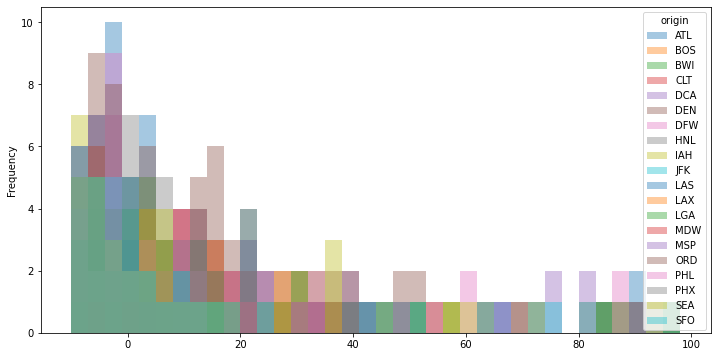

In [31]:
airport_bins = np.arange(-10,100,3)
hi_volume_airports_pivots.plot(kind='hist', bins=airport_bins, figsize=[12,6], alpha=.4, legend=True)

<AxesSubplot:>

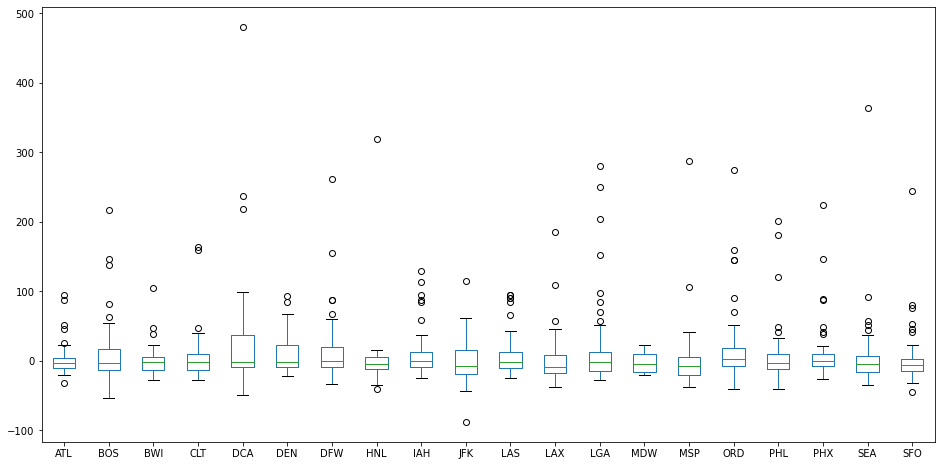

In [33]:
hi_volume_airports_pivots = hi_volume_airports.pivot_table(index='fl_date', columns='origin', values='arr_delay')
hi_volume_airports_pivots.plot(kind='box', figsize=[16,8])